# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings 
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("week3/fraudTest.csv")

In [3]:
df.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0


In [4]:
df_select = df[['trans_date_trans_time', 'category', 'amt', 'city_pop', 'is_fraud']]
df_select.columns

Index(['trans_date_trans_time', 'category', 'amt', 'city_pop', 'is_fraud'], dtype='object')

In [5]:
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])

In [6]:
X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
X_train.shape

(389003, 16)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [9]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [10]:
#RandomOverSampler
ros = RandomOverSampler()
over_X,  over_y = ros.fit_resample(X_train, y_train)
print(over_X.shape)

#RandomUnderSampler
os = RandomUnderSampler()
under_X, under_y = os.fit_resample(X_train, y_train)
print(under_X.shape)

# SMOTE
smote=SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)
print(smote_X.shape)


(774924, 16)
(3082, 16)
(774924, 16)


# 3.) Train three logistic regression models 

In [11]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [12]:

# RandomOverSampler
mod1 = log.fit(over_X, over_y)

# #RandomUnderSample
mod2 = log.fit(under_X, under_y)

# #SMOTE
mod3 = log.fit(smote_X, smote_y)

# 4.) Test the three models

In [13]:
from sklearn.metrics import accuracy_score

# # Test RandomOverSampler
ypred_ros = mod1.predict(X_test)
accuracy_ros = accuracy_score(y_test, ypred_ros)
print('Logistic  Over Sample Accuracy: ', accuracy_ros*100, '%')

# # Test RandomUnderSampler
ypred_rus = mod2.predict(X_test)
accuracy_rus = accuracy_score(y_test, ypred_rus)
print('Logistic Under Sample Accuracy: ', accuracy_rus*100, '%')

# #SMOTE
ypred_smote = mod3.predict(X_test)
accuracy_smote = accuracy_score(y_test, ypred_smote)
print('Logistic SMOTE Sample Accuracy: ', accuracy_smote*100, '%')


Logistic  Over Sample Accuracy:  17.333669233906765 %
Logistic Under Sample Accuracy:  17.333669233906765 %
Logistic SMOTE Sample Accuracy:  17.333669233906765 %


# 5.) Which performed best in Out of Sample metrics?

All three models performed the same. It appears that the over, under and SMOTE samping methods produced the exact results.

# 6.) Pick two features and plot the two classes before and after SMOTE.

In [14]:
raw_temp = pd.concat([X_train,y_train],axis = 1)

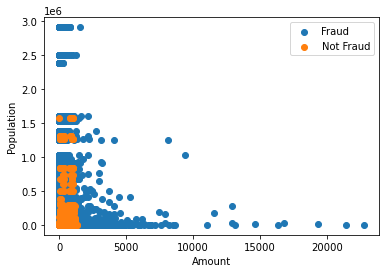

In [15]:
plt.scatter(raw_temp[raw_temp['is_fraud'] == 0]['amt'], raw_temp[raw_temp['is_fraud'] == 0]['city_pop'])
plt.scatter(raw_temp[raw_temp['is_fraud'] == 1]['amt'], raw_temp[raw_temp['is_fraud'] == 1]['city_pop'])
plt.legend(['Fraud', 'Not Fraud'])
plt.xlabel('Amount')
plt.ylabel('Population')
plt.show()
